# Fit noise separately
This notebook shows the use of the fit_noise_separate keyword in ml.solve() in the noise_improvement branch of Pastas. 

In [1]:
import pastas as pt
pt.set_log_level('WARNING')

## With a noisemodel
First we take a model which does not give a very good fit with a noisemodel. The explained variance is below 70 %. We do have a good estimation of the parameter uncertainty though.

evp = 56.6 %


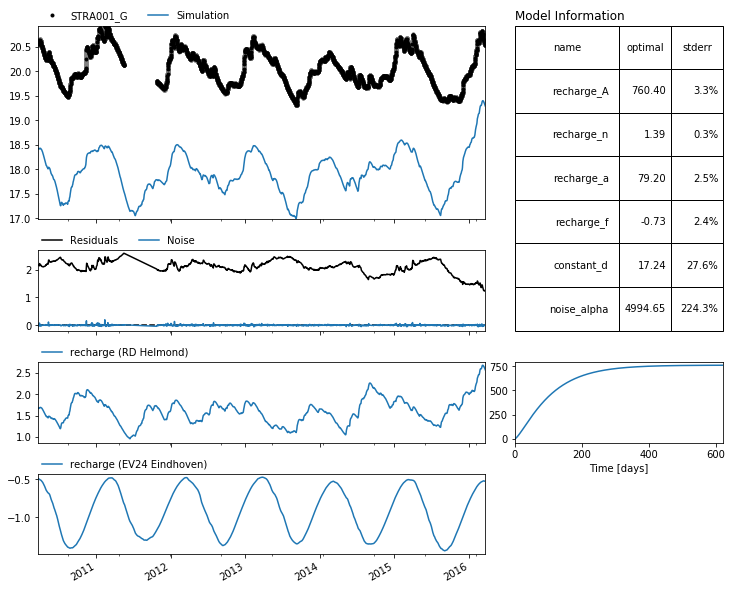

In [2]:
ml = pt.io.load('data/STRA001_G.pas')
ml.solve(report=False, fit_constant=True)
print('evp = {:.1f} %'.format(ml.stats.evp()))
ml.plots.results(split=True);

## Without a noisemodel
When we solve the model without a noisemodel, we get a better fit. The parameter uncertainty is underestimated though, because of autocorrelation in the residuals.

evp = 86.5 %


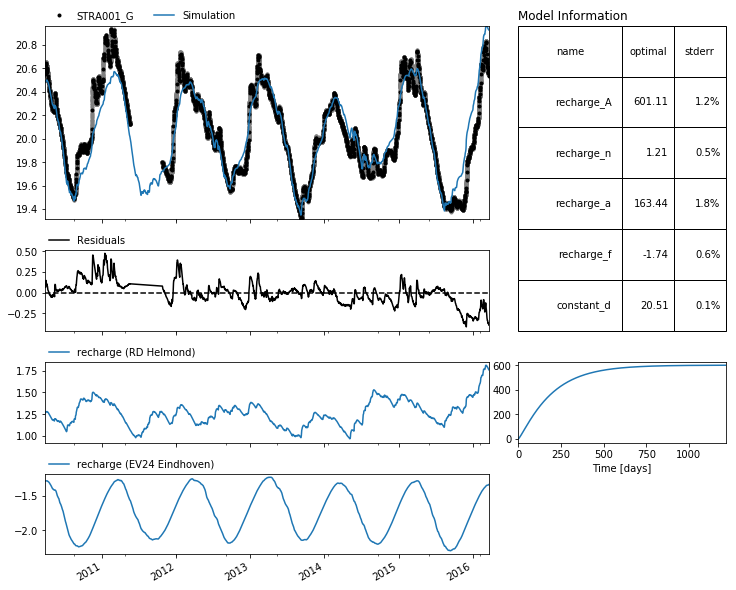

In [3]:
ml.solve(report=False, noise=False)
print('evp = {:.1f} %'.format(ml.stats.evp()))
ml.plots.results(split=True);

## Solving the noisemodel separately
If we wish to use the model with the better fit, but want a better approximation of the parameter uncertainty, we can solve the noisemodel separately using the fit_noise_separate argument in ml.solve(). We now get a model which fits exactly the same as the model without a noisemodel, but with parameter uncertainties that are approximately equal to the model with a noisemodel.

evp = 86.5 %


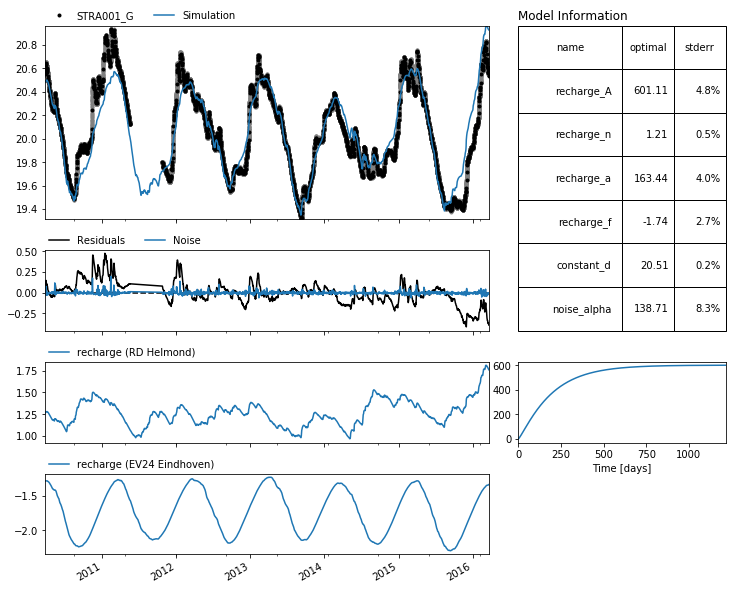

In [4]:
ml.solve(report=False, fit_noise_separate=True)
print('evp = {:.1f} %'.format(ml.stats.evp()))
ml.plots.results(split=True);

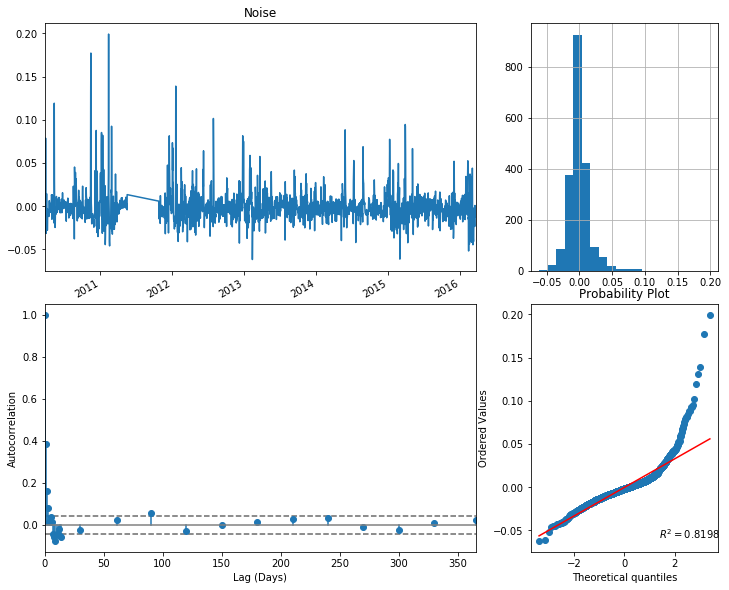

In [5]:
ml.plots.diagnostics()

Model Results STRA001_G           Fit Statistics
nfev     29                     EVP        86.55
nobs     2031                   R2          0.87
noise    False                  RMSE        0.14
tmin     2010-03-25 00:00:00    AIC          nan
tmax     2016-03-21 00:00:00    BIC          nan
freq     D                      ___             
warmup   3650 days 00:00:00     ___             
solver   LeastSquares           ___             

Parameters (5 were optimized)
               optimal  stderr     initial  vary
recharge_A  601.106033  ±1.24%  212.459452  True
recharge_n    1.206286  ±0.48%    1.000000  True
recharge_a  163.444104  ±1.76%   10.000000  True
recharge_f   -1.738741  ±0.60%   -1.000000  True
constant_d   20.507487  ±0.06%   20.061043  True

Parameter correlations |rho| > 0.5
recharge_A recharge_n -0.69
           recharge_a  0.85
recharge_n recharge_a -0.95
           constant_d -0.83
recharge_a constant_d  0.78
recharge_f constant_d -0.84


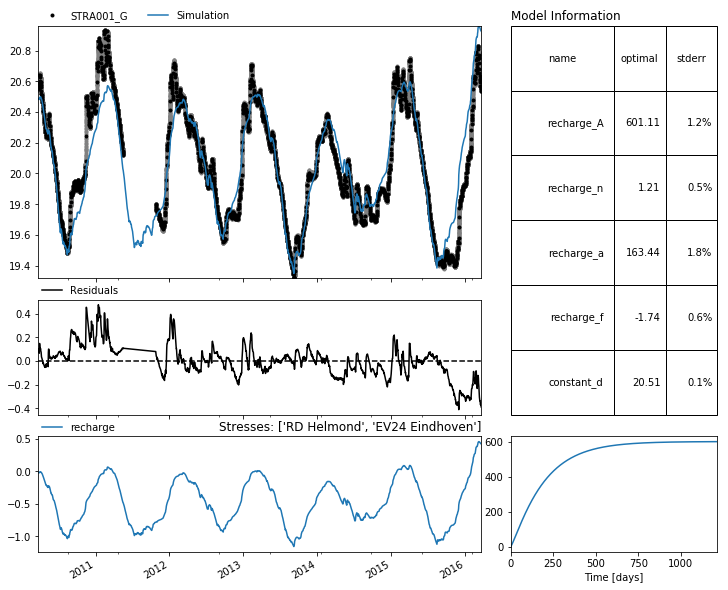

In [6]:
ml.solve(noise=False)
ml.plots.results()

In [7]:
ml.fit.pcor

,recharge_A,recharge_n,recharge_a,recharge_f,constant_d
recharge_A,1.000000,-0.686348,0.854185,0.164799,0.385484
recharge_n,-0.686348,1.000000,-0.948482,0.493906,-0.831527
recharge_a,0.854185,-0.948482,1.000000,-0.337168,0.776264
recharge_f,0.164799,0.493906,-0.337168,1.000000,-0.844903
constant_d,0.385484,-0.831527,0.776264,-0.844903,1.000000
